# Motivation

A standard neural network like a MLP has problems to learn to multiply two input numbers x1,x2!

Reason:
$y = x1*x2$ cannot be simulated using linear layers.


# A MLP has problems to learn to multiply

Here we try to learn the multiplication with a standard MLP and show that is does not work.

In [17]:
import torch
import numpy
import matplotlib.pyplot as plt

def get_ground_truth_output_from_input_tensor(input_vec):
    x1 = input_vec[0].item()
    x2 = input_vec[1].item()
    
    # target is x1*x2
    return torch.tensor( [x1*x2] )
    
    # target is x1+x2
    #return torch.tensor( [x1+x2] )


class net1(torch.nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, output_size)        
        
    def forward(self, input_vec):
        
        out1 = self.layer1(input_vec)
        out2 = self.layer2(out1)
        return out2

    
def learn(net, nr_train_steps):

    loss_fn = torch.nn.L1Loss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

    list_of_errors = []
    list_of_avg_errors = []

    for train_step in range(nr_train_steps):

        if train_step % (nr_train_steps/10) == 0:
            print("train_step=", train_step)

        # generate a training sample
        x1 = numpy.random.uniform(low=0.0, high=10.0)
        x2 = numpy.random.uniform(low=0.0, high=10.0)
        input_vec   = torch.tensor([x1,x2])        
        teacher_vec = get_ground_truth_output_from_input_tensor( input_vec )
        #print( f"{input_vec} --> {teacher_vec}" )

        # forward step
        y_pred = net(input_vec)
        
        # compute loss
        loss = loss_fn(y_pred, teacher_vec)

        # save current loss for plotting it later
        error = abs(teacher_vec-y_pred)
        list_of_errors.append( error.item() )

        if len(list_of_errors) > 100 :
            list_of_avg_errors.append( numpy.mean(list_of_errors[-100:]) )

        # backward step -> computes gradients
        net.zero_grad()
        loss.backward()

        # optimizer step -> adapts weights
        optimizer.step()

        if False:
            error = abs(teacher_vec-y_pred)
            print( f"teacher={teacher_vec}, predicted={y_pred:} -> error={error}" )
        
    plt.plot( list_of_avg_errors )
    plt.show()
    
    print("Testing:")
    numbers = [0, 0.5, 1.0, 2.0, 3.0, 4.0]
    for x1 in numbers:
        for x2 in numbers:
            input_vec = torch.tensor([x1,x2], dtype=torch.float32)
            y_pred = net(input_vec)
            
            input_tensor = torch.tensor([x1,x2]) 
            gt = get_ground_truth_output_from_input_tensor( input_tensor )
            print( f"f({x1},{x2})={gt.detach().numpy()[0]} <-> net: {y_pred.detach().numpy()[0]:.2f}" )

train_step= 0
train_step= 2000
train_step= 4000
train_step= 6000
train_step= 8000
train_step= 10000
train_step= 12000
train_step= 14000
train_step= 16000
train_step= 18000


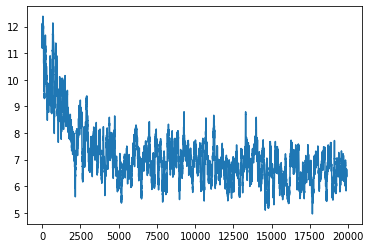

Testing:
f(0,0)=0 <-> net: -23.45
f(0,0.5)=0.0 <-> net: -20.92
f(0,1.0)=0.0 <-> net: -18.40
f(0,2.0)=0.0 <-> net: -13.35
f(0,3.0)=0.0 <-> net: -8.30
f(0,4.0)=0.0 <-> net: -3.25
f(0.5,0)=0.0 <-> net: -21.17
f(0.5,0.5)=0.25 <-> net: -18.64
f(0.5,1.0)=0.5 <-> net: -16.12
f(0.5,2.0)=1.0 <-> net: -11.07
f(0.5,3.0)=1.5 <-> net: -6.02
f(0.5,4.0)=2.0 <-> net: -0.97
f(1.0,0)=0.0 <-> net: -18.89
f(1.0,0.5)=0.5 <-> net: -16.36
f(1.0,1.0)=1.0 <-> net: -13.84
f(1.0,2.0)=2.0 <-> net: -8.79
f(1.0,3.0)=3.0 <-> net: -3.74
f(1.0,4.0)=4.0 <-> net: 1.31
f(2.0,0)=0.0 <-> net: -14.32
f(2.0,0.5)=1.0 <-> net: -11.80
f(2.0,1.0)=2.0 <-> net: -9.28
f(2.0,2.0)=4.0 <-> net: -4.23
f(2.0,3.0)=6.0 <-> net: 0.82
f(2.0,4.0)=8.0 <-> net: 5.87
f(3.0,0)=0.0 <-> net: -9.76
f(3.0,0.5)=1.5 <-> net: -7.24
f(3.0,1.0)=3.0 <-> net: -4.71
f(3.0,2.0)=6.0 <-> net: 0.33
f(3.0,3.0)=9.0 <-> net: 5.38
f(3.0,4.0)=12.0 <-> net: 10.43
f(4.0,0)=0.0 <-> net: -5.20
f(4.0,0.5)=2.0 <-> net: -2.68
f(4.0,1.0)=4.0 <-> net: -0.15
f(4.0,2.0)=8.0 <-

In [18]:
my_net1 = net1(2,100,1)
learn(net=my_net1, nr_train_steps=20000)

# A network with other operations can learn to multiply

## Computing all multiplication variants of an input tensor

In [32]:
x = torch.tensor( [1,2,3], dtype=torch.float32 )

In [43]:
len(x)

3

In [33]:
x+x

tensor([2., 4., 6.])

In [34]:
x*x

tensor([1., 4., 9.])

In [35]:
x.view(3,1)

tensor([[1.],
        [2.],
        [3.]])

In [36]:
x.view(1,3)

tensor([[1., 2., 3.]])

In [37]:
M = x.view(3,1) * x.view(1,3)
M

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [38]:
M.flatten()

tensor([1., 2., 3., 2., 4., 6., 3., 6., 9.])

In [39]:
l1 = torch.nn.Linear(3**2, 1)

In [40]:
l1.weight

Parameter containing:
tensor([[-0.3292, -0.3246, -0.1632,  0.0691, -0.0321,  0.0693,  0.0673,  0.1723,
         -0.2501]], requires_grad=True)

In [41]:
l1( M.flatten() )

tensor([-1.8811], grad_fn=<AddBackward0>)

In [44]:
class net2(torch.nn.Module):
    
    def __init__(self, input_size):
        
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, 1)
        
    def forward(self, x):
        
        N = len(x)
                
        M = x.view(N,1) * x.view(1,N)
        M_flat = torch.flatten()
        out = self.layer1( M_flat )
        return out2